# Importing the libraries

In [1]:
import math
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Importing the datasets

Training Dataset

In [2]:
dataset = pd.read_csv('./train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Testing Dataset

In [3]:
dataset_test = pd.read_csv('./test.csv', low_memory=False)
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data Preprocessing

### Gaining Information from the dataset

This function helps us to know about the kind of values present in each column of the dataset as well as the number of null values in each column

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


The correlation matrix helps us to know how values in each column is dependent on values of another columns. The positive values mean positive correlation and negative values mean negative correlation. The closer its value is to zero the more independent it is from the given column and the closer to 1 means highly dependent

In [6]:
dataset.apply(lambda x : pd.factorize(x)[0]).corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.120150,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030323
Survived,-0.005007,1.000000,0.247845,-0.005007,0.543351,0.042743,-0.136302,0.086210,-0.047298,0.191981,0.270495,0.101849
Pclass,0.018305,0.247845,1.000000,0.018305,0.118133,0.180735,-0.149630,-0.000343,0.020431,0.079498,0.187437,-0.168809
Name,1.000000,-0.005007,0.018305,1.000000,-0.042939,0.120150,-0.031023,0.001206,0.760875,0.299982,0.241918,-0.030323
Sex,-0.042939,0.543351,0.118133,-0.042939,1.000000,0.009117,-0.046152,0.242417,-0.132709,0.137725,0.082104,0.111249
Age,0.120150,0.042743,0.180735,0.120150,0.009117,1.000000,0.003777,0.136160,0.070385,0.114674,0.165159,-0.152716
SibSp,-0.031023,-0.136302,-0.149630,-0.031023,-0.046152,0.003777,1.000000,0.165255,-0.122426,-0.046556,-0.108709,-0.030612
Parch,0.001206,0.086210,-0.000343,0.001206,0.242417,0.136160,0.165255,1.000000,-0.262607,0.074306,-0.002761,-0.082982
Ticket,0.760875,-0.047298,0.020431,0.760875,-0.132709,0.070385,-0.122426,-0.262607,1.000000,0.303257,0.212438,-0.020135
Fare,0.299982,0.191981,0.079498,0.299982,0.137725,0.114674,-0.046556,0.074306,0.303257,1.000000,0.379659,0.077933


In [7]:
dataset_test.apply(lambda x : pd.factorize(x)[0]).corr()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,0.026751,1.000000,-0.023245,0.170140,-0.002157,0.040256,0.877124,0.443555,0.231404,-0.001026
Pclass,0.026751,1.000000,0.026751,0.108615,0.173403,0.008977,-0.025732,-0.024305,0.174918,0.554753,0.372344
Name,1.000000,0.026751,1.000000,-0.023245,0.170140,-0.002157,0.040256,0.877124,0.443555,0.231404,-0.001026
Sex,-0.023245,0.108615,-0.023245,1.000000,0.035129,0.105519,0.178626,-0.064568,0.087049,0.083616,-0.037432
Age,0.170140,0.173403,0.170140,0.035129,1.000000,0.211509,0.215584,0.131836,0.174033,0.144595,0.114690
SibSp,-0.002157,0.008977,-0.002157,0.105519,0.211509,1.000000,0.371468,-0.120646,0.115487,0.018469,0.047569
Parch,0.040256,-0.025732,0.040256,0.178626,0.215584,0.371468,1.000000,-0.074875,0.183114,-0.009085,0.064688
Ticket,0.877124,-0.024305,0.877124,-0.064568,0.131836,-0.120646,-0.074875,1.000000,0.456125,0.203992,-0.039048
Fare,0.443555,0.174918,0.443555,0.087049,0.174033,0.115487,0.183114,0.456125,1.000000,0.290890,0.041337
Cabin,0.231404,0.554753,0.231404,0.083616,0.144595,0.018469,-0.009085,0.203992,0.290890,1.000000,0.325097


Describing the distribution of values for numerical data columns

In [8]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dataset_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Removing Null values

Null values in Age is replaced by average age of training dataset. This is done to ensure that we make our model totally dependent on values of the training dataset.

In [11]:
total = 0
cnt = 0
for i in dataset.Age:
    if not np.isnan(i):
        total += i
        cnt += 1
avg = total / cnt
avg

29.69911764705882

In [12]:
ind = 0
for i in dataset.Age:
    if np.isnan(i):
        dataset.Age[ind] = avg
    ind += 1

In [13]:
ind = 0
for i in dataset_test.Age:
    if np.isnan(i):
        dataset_test.Age[ind] = avg
    ind += 1

The null values in Cabin are replaced by the most frequently occuring value till that point in the training dataset while with the most frequent value of the training dataset in the test dataset

In [14]:
ind = 0
freq = {}
for i in dataset.Cabin:
    if not pd.isna(i):
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
    else:
        if len(freq) != 0:
            sort_orders = sorted(freq.items(), key=lambda x: x[1], reverse=True)
            dataset.Cabin[ind] = sort_orders[0][0]
    ind += 1
sort_orders = sorted(freq.items(), key=lambda x: x[1], reverse=True)
ind = 0
for i in dataset.Cabin:
    if pd.isna(i):
        dataset.Cabin[ind] = sort_orders[0][0]
    ind += 1

In [15]:
dataset.Cabin.unique()

array(['G6', 'C85', 'C123', 'E46', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

Since there are multiple values of Cabin in some rows we take any one of these. For example if value is 'C22 C26' we may take either C26 or C22.

In [16]:
ind = 0
for i in dataset.Cabin:
    if ' ' in i:
        l = i.strip().split(" ")
        dataset.Cabin[ind] = l[random.randint(0, len(l)) - 1]
    ind += 1

In [17]:
ind = 0
for i in dataset_test.Cabin:
    if pd.isna(i):
        dataset_test.Cabin[ind] = sort_orders[0][0]
    ind += 1

In [18]:
ind = 0
for i in dataset_test.Cabin:
    if ' ' in i:
        l = i.strip().split(" ")
        dataset_test.Cabin[ind] = l[random.randint(0, len(l)) - 1]
    ind += 1

For the Embarked Column, we are replacing the null values with the most frequent upto that point in training dataset and with the most frequent value of training dataset in the testing dataset 

In [19]:
ind = 0
freq = {}
for i in dataset.Embarked:
    if not pd.isna(i):
        if i in freq:
            freq[i] += 1
        else:
            freq[i] = 1
    else:
        if len(freq) != 0:
            sort_orders = sorted(freq.items(), key=lambda x: x[1], reverse=True)
            dataset.Embarked[ind] = sort_orders[0][0]
    ind += 1
sort_orders = sorted(freq.items(), key=lambda x: x[1], reverse=True)
ind = 0
for i in dataset.Embarked:
    if pd.isna(i):
        dataset.Embarked[ind] = sort_orders[0][0]
    ind += 1

In [20]:
dataset.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
ind = 0
for i in dataset_test.Embarked:
    if pd.isna(i):
        dataset_test.Cabin[ind] = sort_orders[0][0]
    ind += 1

Replacing null values of the Fare column with the average of this value in ther training dataset

In [22]:
total = 0
cnt = 0
for i in dataset.Fare:
    if not np.isnan(i):
        total += i
        cnt += 1
avg = total / cnt
ind = 0
for i in dataset.Fare:
    if np.isnan(i):
        dataset_test.Fare[ind] = avg
    ind += 1

In [23]:
ind = 0
for i in dataset_test.Fare:
    if np.isnan(i):
        dataset_test.Fare[ind] = avg
    ind += 1

### Adding new Columns

Keeping in mind the curse of dimensionality we are experimenting by adding a few new columns for gaining better insights into the dataset. We are breaking the name of every person into surname, name and annotation. This may help us to know whether people having common surnames have more chance of survival or not. For example, Captain of the ship has least chance of survival in some cases while highest chance of survival in some other cases in comparison to normal passengers.

In [24]:
name = []
ann = []
surname = []
for i in dataset.Name:
    intermediate = i.split(", ")[1].split(" ")
    intermediate.pop(0)
    ann.append(i.split(", ")[1].split(" ")[0])
    name.append((" ").join(intermediate))
    surname.append(i.split(", ")[0])
dataset['Ann'] = ann
dataset['Name'] = name
dataset['Surname'] = surname

In [25]:
firstletter = []
lastno = []
for i in dataset.Cabin:
    firstletter.append(i[0])
    if i[1:] == '':
        lastno.append(0)
    else:    
        lastno.append(int(i[1:]))
dataset['firstletter'] = firstletter
dataset['lastno'] = lastno

In [26]:
name = []
ann = []
surname = []
for i in dataset_test.Name:
    intermediate = i.split(", ")[1].split(" ")
    intermediate.pop(0)
    ann.append(i.split(", ")[1].split(" ")[0])
    name.append((" ").join(intermediate))
    surname.append(i.split(", ")[0])
dataset_test['Ann'] = ann
dataset_test['Name'] = name
dataset_test['Surname'] = surname

In [27]:
firstletter = []
lastno = []
for i in dataset_test.Cabin:
    firstletter.append(i[0])
    if i[1:] == '':
        lastno.append(0)
    else:    
        lastno.append(int(i[1:]))
dataset_test['firstletter'] = firstletter
dataset_test['lastno'] = lastno

### Encoding Categorical Data

We have columns which contain strings. Therefore we need to encode them into numerical data. Since our training dataset must be the only sample we have therefore, we use only the unique values present in training dataset for encoding. For a unique value present in testing dataset we give a constant value which equals the number of uniques in that column of training datset plus one.

In [28]:
for i in dataset.columns:
    print(i, " Unique Values: ", len(dataset[i].unique()))

PassengerId  Unique Values:  891
Survived  Unique Values:  2
Pclass  Unique Values:  3
Name  Unique Values:  799
Sex  Unique Values:  2
Age  Unique Values:  89
SibSp  Unique Values:  7
Parch  Unique Values:  7
Ticket  Unique Values:  681
Fare  Unique Values:  248
Cabin  Unique Values:  152
Embarked  Unique Values:  3
Ann  Unique Values:  17
Surname  Unique Values:  667
firstletter  Unique Values:  8
lastno  Unique Values:  97


In [29]:
Encode = ["Pclass", "Name", "Sex", "SibSp", "Parch", "Ticket", "Cabin", "Embarked", "Ann", "Surname", "firstletter"]
mapping = {}
for i in Encode:
    encoder = LabelEncoder().fit(dataset[i])
    dataset[i] = encoder.transform(dataset[i])
    mapping[i] = dict(zip(encoder.classes_, range(len(encoder.classes_))))

In [30]:
for i in Encode:
    for j in range (0, len(dataset_test[i])):
        if dataset_test[i][j] in mapping[i]:
            dataset_test[i][j] = mapping[i][dataset_test[i][j]]
        else:
            dataset_test[i][j] = len(mapping[i])

In [31]:
dataset.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ann,Surname,firstletter,lastno
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,1.308642,401.808081,0.647587,29.699118,0.507295,0.381594,338.528620,32.204208,114.092031,1.536476,10.241302,326.023569,4.268238,35.268238
std,257.353842,0.486592,0.836071,230.763521,0.477990,13.002015,1.005995,0.806057,200.850657,49.693429,43.116962,0.791503,1.830798,193.555742,2.027588,42.571591
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,1.000000,204.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,71.500000,1.000000,8.000000,161.500000,2.000000,6.000000
50%,446.000000,0.000000,2.000000,403.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,148.000000,2.000000,11.000000,317.000000,6.000000,6.000000
75%,668.500000,1.000000,2.000000,598.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,148.000000,2.000000,11.000000,494.500000,6.000000,68.500000
max,891.000000,1.000000,2.000000,798.000000,1.000000,80.000000,6.000000,6.000000,680.000000,512.329200,151.000000,2.000000,16.000000,666.000000,7.000000,148.000000


All null values removed and new columns added

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int32  
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int32  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int32  
 11  Embarked     891 non-null    int32  
 12  Ann          891 non-null    int32  
 13  Surname      891 non-null    int32  
 14  firstletter  891 non-null    int32  
 15  lastno       891 non-null    int64  
dtypes: float64(2), int32(8), int64(6)
memory usage: 83.7 KB


In [33]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Ann          418 non-null    object 
 12  Surname      418 non-null    object 
 13  firstletter  418 non-null    object 
 14  lastno       418 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 49.1+ KB


# Data Visualization

In [34]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

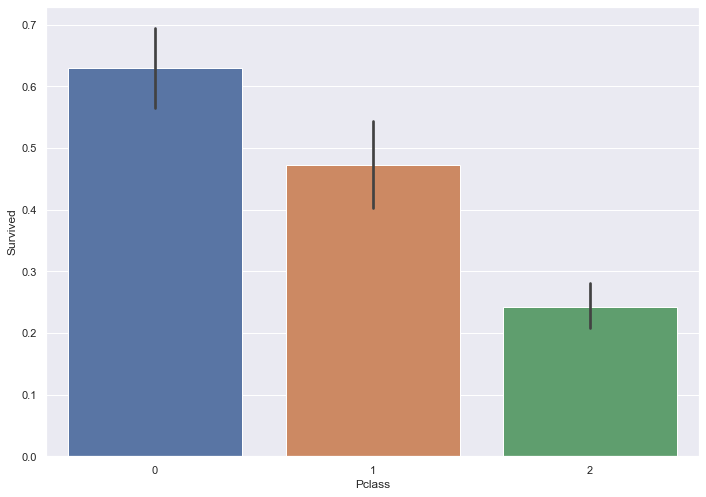

In [35]:
sns.barplot(y="Survived", x = 'Pclass', data=dataset)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

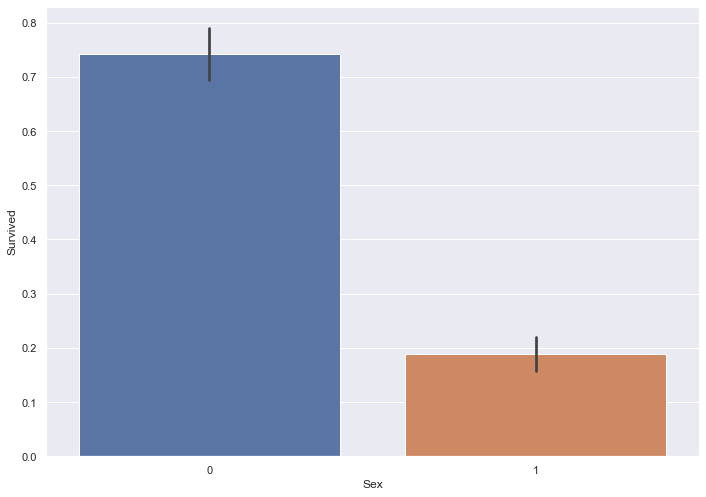

In [36]:
sns.barplot(y="Survived", x = 'Sex', data=dataset)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

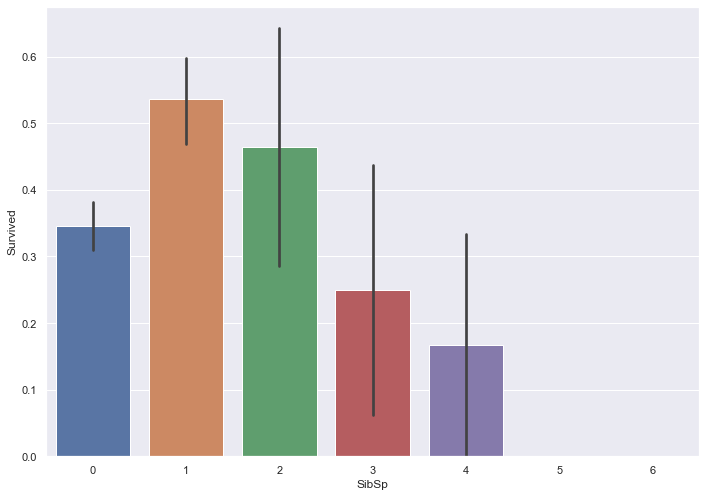

In [37]:
sns.barplot(y="Survived", x = 'SibSp', data=dataset)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

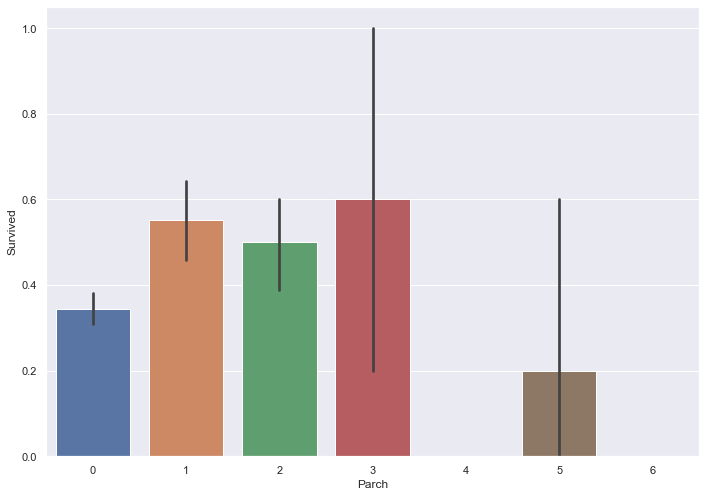

In [38]:
sns.barplot(y="Survived", x = 'Parch', data=dataset)

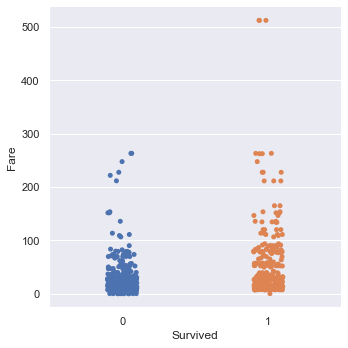

In [39]:
sns.catplot(y='Fare', x = 'Survived', data=dataset)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

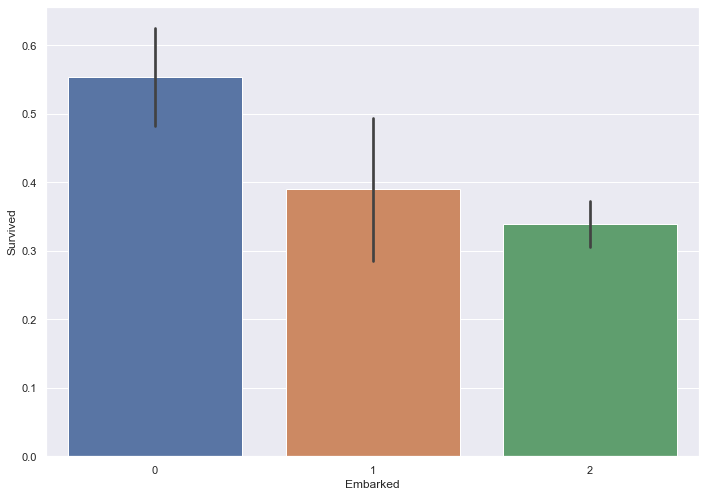

In [40]:
sns.barplot(y="Survived", x = 'Embarked', data=dataset)

<AxesSubplot:xlabel='Ann', ylabel='Survived'>

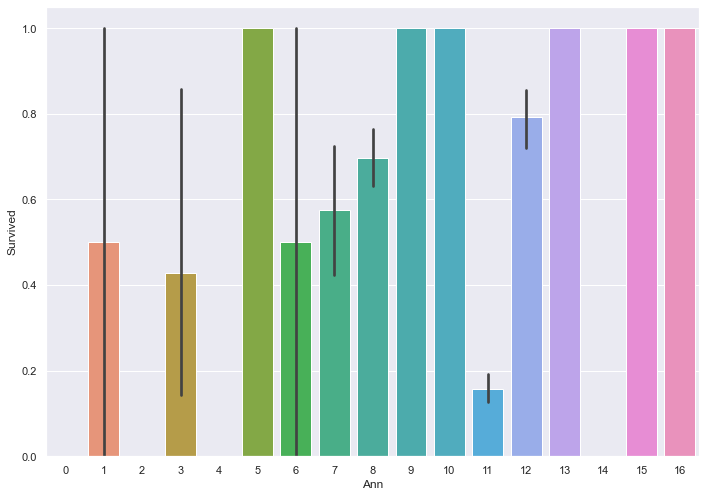

In [41]:
sns.barplot(y="Survived", x = 'Ann', data=dataset)

<AxesSubplot:xlabel='firstletter', ylabel='Survived'>

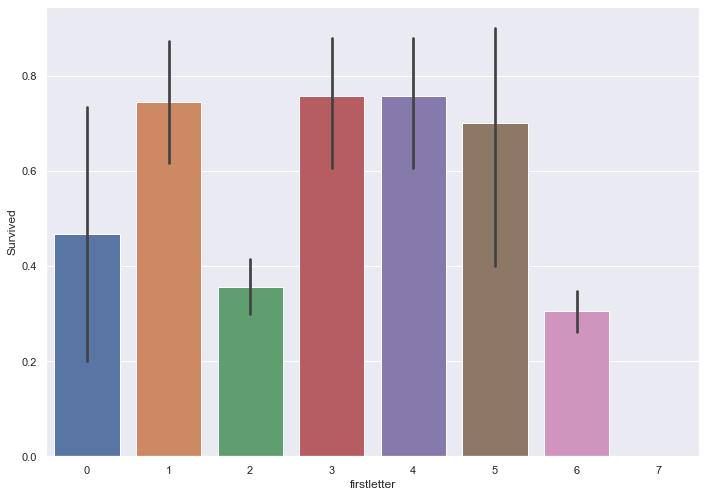

In [42]:
sns.barplot(y="Survived", x = 'firstletter', data=dataset)

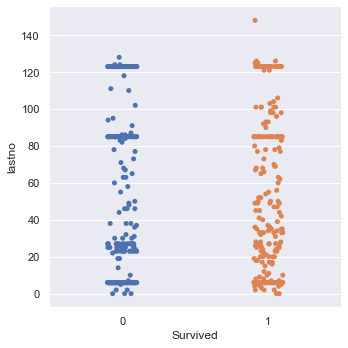

In [43]:
sns.catplot(y="lastno", x = 'Survived', data=dataset)

In [44]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ann,Surname,firstletter,lastno
0,1,0,2,597,1,22.000000,1,0,523,7.2500,148,2,11,73,6,6
1,2,1,0,419,0,38.000000,1,0,596,71.2833,85,0,12,136,2,85
2,3,1,2,482,0,26.000000,0,0,669,7.9250,85,2,8,251,2,85
3,4,1,0,379,0,35.000000,1,0,49,53.1000,57,2,12,198,2,123
4,5,0,2,782,1,35.000000,0,0,472,8.0500,85,2,11,11,2,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,457,1,27.000000,0,0,101,13.0000,148,2,14,406,6,6
887,888,1,0,526,0,19.000000,0,0,14,30.0000,30,2,8,221,1,42
888,889,0,2,125,0,29.699118,1,2,675,23.4500,148,2,8,293,6,6
889,890,1,0,463,1,26.000000,0,0,8,30.0000,62,0,11,52,2,148


# Splitting into Training and Validation Datasets

We divide the dataset into 80% training and 20% validation dataset

In [45]:
X = dataset.iloc[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
y = dataset.Survived

In [46]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting the Model

We followed a pattern here. At first take random values and check the performance of the model. Then we did hyperparamter tuning and used those parameters for making the final model.  

### RandomForest

In [47]:
classifier = RandomForestClassifier(n_estimators = 30)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_val)

In [48]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[99, 11],
       [13, 56]], dtype=int64)

In [49]:
parameters = {'n_estimators':[0, 5, 10, 20, 25, 30], 'max_depth':[1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [2, 5, 10, 20], 'min_samples_split': [5, 10, 20, 30]}
classifier = RandomForestClassifier()
clf = GridSearchCV(classifier, parameters, cv = 3)
clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [5, 10, 20, 30],
                         'n_estimators': [0, 5, 10, 20, 25, 30]})

In [50]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 25}

In [51]:
classifier = RandomForestClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 5, min_samples_split = 20, n_estimators = 20)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_val)

In [52]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[94, 16],
       [17, 52]], dtype=int64)

In [53]:
classifier.feature_importances_

array([0.02989604, 0.06586293, 0.05769449, 0.24072587, 0.04697702,
       0.06398625, 0.02147281, 0.0664302 , 0.06558531, 0.0257015 ,
       0.015842  , 0.23427989, 0.0223257 , 0.02336622, 0.01985376])

In [54]:
ind = 0
taken = []
for i in classifier.feature_importances_:
    if i > np.average(classifier.feature_importances_) / 2:
        taken.append(ind)
    ind += 1

In [55]:
dataset_cropped = dataset.iloc[:, taken]

In [56]:
dataset_cropped

,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Embarked
0,0,2,597,1,22.000000,0,523,2
1,1,0,419,0,38.000000,0,596,0
2,1,2,482,0,26.000000,0,669,2
3,1,0,379,0,35.000000,0,49,2
4,0,2,782,1,35.000000,0,472,2
...,...,...,...,...,...,...,...,...
886,0,1,457,1,27.000000,0,101,2
887,1,0,526,0,19.000000,0,14,2
888,0,2,125,0,29.699118,2,675,2
889,1,0,463,1,26.000000,0,8,0


In [57]:
X_cropped = dataset_cropped.iloc[:, [1, 2, 3, 4, 5, 6]]
y_cropped = dataset_cropped.Survived

In [58]:
parameters = {'n_estimators':[0, 5, 10, 20, 25, 30], 'max_depth':[1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [2, 5, 10, 20], 'min_samples_split': [5, 10, 20, 30]}
classifier = RandomForestClassifier()
clf = GridSearchCV(classifier, parameters, cv = 3)
clf.fit(X_cropped, y_cropped)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 5, 10, 20],
                         'min_samples_split': [5, 10, 20, 30],
                         'n_estimators': [0, 5, 10, 20, 25, 30]})

In [59]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 20}

In [60]:
dataset_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ann,Surname,firstletter,lastno
0,892,2,382,1,34.500000,0,0,681,7.8292,148,1,11,306,6,6
1,893,2,799,0,47.000000,1,0,681,7.0000,148,2,12,667,6,6
2,894,1,799,1,62.000000,0,0,681,9.6875,148,1,11,667,6,6
3,895,2,25,1,27.000000,0,0,681,8.6625,148,2,11,667,6,6
4,896,2,799,0,22.000000,1,1,251,12.2875,148,2,12,259,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,2,799,1,29.699118,0,0,681,8.0500,148,2,11,667,6,6
414,1306,0,799,0,39.000000,0,0,611,108.9000,152,0,17,667,2,105
415,1307,2,799,1,38.500000,0,0,681,7.2500,148,2,11,667,6,6
416,1308,2,270,1,29.699118,0,0,681,8.0500,148,2,11,667,6,6


In [61]:
x_test = dataset_test.iloc[:, [1, 2, 3, 6, 7, 10]]

In [62]:
x_test

,Pclass,Name,Sex,Parch,Ticket,Embarked
0,2,382,1,0,681,1
1,2,799,0,0,681,2
2,1,799,1,0,681,1
3,2,25,1,0,681,2
4,2,799,0,1,251,2
...,...,...,...,...,...,...
413,2,799,1,0,681,2
414,0,799,0,0,611,0
415,2,799,1,0,681,2
416,2,270,1,0,681,2


In [63]:
classifier = RandomForestClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 20, min_samples_split = 30, n_estimators = 10)
classifier.fit(X_cropped, y_cropped)
y_pred = classifier.predict(x_test)

In [64]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('predictionRF.csv')

### K-Nearest Neighbors

In [65]:
X_scaled = X
y_scaled = y

In [66]:
scaler = StandardScaler()
scaler.fit_transform(X_scaled)

array([[-1.73010796,  0.82737724,  0.84632764, ..., -1.30797296,
         0.85457922, -0.68789246],
       [-1.72622007, -1.56610693,  0.074542  , ..., -0.98230252,
        -1.11931602,  1.16884741],
       [-1.72233219,  0.82737724,  0.34770209, ..., -0.38782474,
        -1.11931602,  1.16884741],
       ...,
       [ 1.72233219,  0.82737724, -1.20020507, ..., -0.17071111,
         0.85457922, -0.68789246],
       [ 1.72622007, -1.56610693,  0.26532048, ..., -1.41652977,
        -1.11931602,  2.6495387 ],
       [ 1.73010796,  0.82737724,  0.85499939, ..., -0.86340697,
         0.85457922, -0.68789246]])

In [67]:
x_scaled_train, x_scaled_val, y_scaled_train, y_scaled_val = train_test_split(X_scaled, y_scaled, test_size = 0.20, random_state = 0)

In [68]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_scaled_train, y_scaled_train)
y_pred = classifier.predict(x_scaled_val)

In [69]:
cm = confusion_matrix(y_scaled_val, y_pred)
cm

array([[79, 31],
       [43, 26]], dtype=int64)

In [70]:
parameters = {'n_neighbors':[2, 5, 10, 20, 25, 50], 'p' : [1, 2, 3, 4, 5]}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters, cv = 3)
clf.fit(X_scaled, y_scaled)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 10, 20, 25, 50],
                         'p': [1, 2, 3, 4, 5]})

In [71]:
clf.best_params_

{'n_neighbors': 10, 'p': 1}

In [72]:
x_test = dataset_test

In [73]:
scaler.transform(x_test)

array([[ 1.73399584,  0.82737724, -0.08588535, ..., -0.10350928,
         0.85457922, -0.68789246],
       [ 1.73788372,  0.82737724,  1.72217427, ...,  1.76263403,
         0.85457922, -0.68789246],
       [ 1.74177161, -0.36936484,  1.72217427, ...,  1.76263403,
         0.85457922, -0.68789246],
       ...,
       [ 3.34746731,  0.82737724,  1.72217427, ...,  1.76263403,
         0.85457922, -0.68789246],
       [ 3.35135519,  0.82737724, -0.57150328, ...,  1.76263403,
         0.85457922, -0.68789246],
       [ 3.35524307,  0.82737724,  1.72217427, ...,  0.8063002 ,
         0.85457922, -0.68789246]])

In [74]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 1)
classifier.fit(X_scaled, y_scaled)
y_pred = classifier.predict(x_test)

In [75]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('predictionKNN.csv')

### Support Vector Classifier

In [76]:
classifier = SVC(kernel = 'sigmoid')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_val)

In [77]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[81, 29],
       [41, 28]], dtype=int64)

In [78]:
parameters = {'kernel':['sigmoid', 'rbf']}
classifier = SVC()
clf = GridSearchCV(classifier, parameters, cv = 3)
clf.fit(X, y)

GridSearchCV(cv=3, estimator=SVC(), param_grid={'kernel': ['sigmoid', 'rbf']})

In [79]:
clf.best_params_

{'kernel': 'rbf'}

In [80]:
classifier = SVC(kernel = 'rbf')
classifier.fit(X, y)
y_pred = classifier.predict(x_test)

In [81]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('predictionSVC.csv')

### Gaussian Naive Bayes

In [82]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_val)

In [83]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[86, 24],
       [16, 53]], dtype=int64)

In [84]:
classifier = GaussianNB()
classifier.fit(X, y)
y_pred = classifier.predict(x_test)

In [85]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('predictionGNB.csv')

### Logistic Regression

In [86]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_val)

In [87]:
cm = confusion_matrix(y_val, y_pred)
cm

array([[96, 14],
       [23, 46]], dtype=int64)

In [88]:
classifier.coef_

array([[ 3.19434984e-04, -7.50525315e-01, -9.51144034e-04,
        -1.64850487e+00, -3.36165212e-02, -7.02752294e-01,
         6.86281835e-02, -5.45971597e-04,  8.20899815e-03,
         3.27869700e-02, -3.33780702e-01,  8.46206549e-02,
        -1.64165620e-05, -4.15847941e-01,  1.06899687e-02]])

In [89]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [90]:
parameters = {'fit_intercept' : [True, False], 'penalty' : ['l1', 'l2']}
classifier = LogisticRegression()
clf = GridSearchCV(classifier, parameters, cv = 3)
clf.fit(X, y)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2']})

In [91]:
clf.best_params_

{'fit_intercept': False, 'penalty': 'l2'}

In [92]:
classifier = LogisticRegression(fit_intercept = True, penalty = 'l2')
classifier.fit(X, y)
y_pred = classifier.predict(x_test)

In [93]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('predictionLR.csv')

### Artificial Neural Networks

In [94]:
classifier = Sequential()
classifier.add(Dense(32, activation = 'relu', input_dim = 15))
classifier.add(Dense(16, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X, y, batch_size = 8, epochs = 20)

Epoch 1/20
112/112 [==============================] - 1s 1ms/step - loss: 37.0817 - accuracy: 0.4944
Epoch 2/20
112/112 [==============================] - 0s 1ms/step - loss: 3.2972 - accuracy: 0.6179
Epoch 3/20
112/112 [==============================] - 0s 1ms/step - loss: 2.7467 - accuracy: 0.6116
Epoch 4/20
112/112 [==============================] - 0s 1ms/step - loss: 2.5948 - accuracy: 0.6379
Epoch 5/20
112/112 [==============================] - 0s 1ms/step - loss: 1.7735 - accuracy: 0.6576
Epoch 6/20
112/112 [==============================] - 0s 1ms/step - loss: 2.0697 - accuracy: 0.6698
Epoch 7/20
112/112 [==============================] - 0s 1ms/step - loss: 1.9157 - accuracy: 0.5990
Epoch 8/20
112/112 [==============================] - 0s 1ms/step - loss: 2.0667 - accuracy: 0.6264
Epoch 9/20
112/112 [==============================] - 0s 1ms/step - loss: 1.8974 - accuracy: 0.6479
Epoch 10/20
112/112 [==============================] - 0s 1ms/step - loss: 1.7504 - accuracy: 0.623

In [95]:
x_test['Name'] = x_test['Name'].astype(int)
x_test['Sex'] = x_test['Sex'].astype(int)
x_test['Cabin'] = x_test['Cabin'].astype(int)
x_test['Embarked'] = x_test['Embarked'].astype(int)
x_test['Name'] = x_test['Name'].astype(int)
x_test['Surname'] = x_test['Surname'].astype(int)
x_test['Ann'] = x_test['Ann'].astype(int)
x_test['Ticket'] = x_test['Ticket'].astype(int)
x_test['firstletter'] = x_test['firstletter'].astype(int)

In [96]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int32  
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int32  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int32  
 10  Embarked     418 non-null    int32  
 11  Ann          418 non-null    int32  
 12  Surname      418 non-null    int32  
 13  firstletter  418 non-null    int32  
 14  lastno       418 non-null    int64  
dtypes: float64(2), int32(8), int64(5)
memory usage: 36.0 KB


In [97]:
y_pred = classifier.predict(x_test)

In [98]:
x_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ann,Surname,firstletter,lastno
0,892,2,382,1,34.500000,0,0,681,7.8292,148,1,11,306,6,6
1,893,2,799,0,47.000000,1,0,681,7.0000,148,2,12,667,6,6
2,894,1,799,1,62.000000,0,0,681,9.6875,148,1,11,667,6,6
3,895,2,25,1,27.000000,0,0,681,8.6625,148,2,11,667,6,6
4,896,2,799,0,22.000000,1,1,251,12.2875,148,2,12,259,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,2,799,1,29.699118,0,0,681,8.0500,148,2,11,667,6,6
414,1306,0,799,0,39.000000,0,0,611,108.9000,152,0,17,667,2,105
415,1307,2,799,1,38.500000,0,0,681,7.2500,148,2,11,667,6,6
416,1308,2,270,1,29.699118,0,0,681,8.0500,148,2,11,667,6,6


In [99]:
for i in range (0, len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = 1
    else:
        y_pred[i] = 0

In [100]:
prediction = pd.DataFrame(y_pred, columns=['predictions']).to_csv('predictionANN.csv')